In [37]:
import cirq

from cirq.aqt.aqt_device import get_aqt_device

import qiskit
from qiskit.tools.visualization import plot_histogram

In [38]:
device, qubits = get_aqt_device(2)
circuit = cirq.Circuit(device=device)
# (q0,q1) = cirq.LineQubit.range(2)
circuit.append([cirq.H(q0),cirq.X(q1),cirq.CNOT(q0,q1)])
circuit.append([cirq.measure(q0),cirq.measure(q1)])
print(circuit)

0: ───Rx(π)───Ry(-0.5π)───Ry(0.5π)───MS(0.25π)───Rx(-0.5π)───Ry(-0.5π)───M───
                                     │
1: ───X──────────────────────────────MS(0.25π)───Rx(-0.5π)───M───────────────


In [39]:
sim = cirq.Simulator()
results = sim.run(circuit, repetitions=100)
print(results)

0=1001010000011101100011010000110010110000000010011101110011110001010101100001110101100011110101110101
1=0110101111100010011100101111001101001111111101100010001100001110101010011110001010011100001010001010


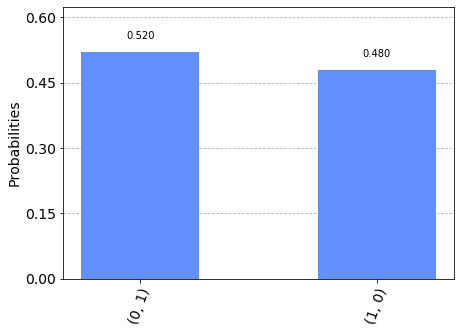

In [40]:
counts = cirq.TrialResult.multi_measurement_histogram(results, keys=['0','1'])
plot_histogram(counts)